<font color=pink, size=6><b>OmegAlpes Tutorial 1: Create optimisation model</b></font><br>
   
    In this tutorial, we will learn how to create optimisation model and simple power balance simulation in OmegAlpes. 

`Learning outcomes :`
>1. Model an energy system with OmegAlpes
2. General understanding of the model components, such as :
    - Time unit
    - Various type of energy units
    - Input data
    - Defining model objective
3. Processing optimisation result

    At the end of this tutorial, you will be able to find out how the result of John's PV installation.
    

# Creating Optimisation model 

    Let's start with creating an OmegAlpes model of John's home.
    
    He describes to us his home has several home appliances, with PV panels newly installed on top of his home.


<img src="./images/1-John house.JPG" width="550" height="150">

    He gives us his home electricity usage and pv production profile
    
<img src="./images/johns cons prod.JPG" width="550" height="150" alt="Graph is produced using OmegAlpes">
<br>
    
    
    Let's start modelling !
    
    First we will import all the necessary functions needed to build our model.
    

In [4]:
from Python_Scripts.Omegalpes_tutorial_1 import *

## Create time unit
    First step, we create timeunit.
    This module creates the Time object that defines the studied time period.
    

In [5]:
time = TimeUnit(periods=24*1, dt=1)

You are studying the period from 2018-01-01 00:00:00 to 2018-01-01 23:00:00


    where :
    dt = delta t between values in hours (int or float), i.e. 1/6 will be 10 minutes. and 1 in this case will be 60 minutes
    period = 24*dt which means we will study the period of 24 hours
    
`to learn more in detail` : <a href="https://omegalpes.readthedocs.io/en/latest/api/general.html#module-omegalpes.general.time">time module</a>

## Create empty model
    Second step, we create an empty model where we will fill the optimization model.
    

In [6]:
model = OptimisationModel(time=time, name='tutorial_1')

    time in this model will refer to the timeunit we set at first step
    
    
`to learn more in detail` : <a href="https://omegalpes.readthedocs.io/en/latest/api/general.html#module-omegalpes.general.optimisation.model">model module</a>

## Create energy unit
    Third step, we create energy units which mainly consist of 3 major types/classes :
        1. Production units
        2. Consumption units
        3. Storage units
    In this level, we will learn how to utilize the first two.
    
    These classes have multiple variety of classes, some of the commonly used are:
        1. FixedEnergyUnit: energy unit with a fixed power profile
        2. VariableEnergyUnit: energy unit with a variable power profile
    We will learn how to create these units in this tutorial

`to learn more in detail` : <a href="https://omegalpes.readthedocs.io/en/latest/api/energy_package.html#module-omegalpes.energy.units.energy_units">energy units module</a>

### Create fixed energy units
    We will start with fixed energy units with fixed power profile data we got from John.
    
    First, we start with consumption units. As its name implies, this energy units have power flow direction always ‘in’.
    
    We will import the home consumptions data from the csv file provided.

In [7]:
consumption_profile = open("data/house tot con 24 kwh.csv", "r")

house_cons_file = [p for p in map(float, consumption_profile)]

    Data from the file will be stored in "house_cons_file" with map function. Keyword: "creating a list of float values from string values" to learn more.
    
    Then, we create the consumption unit.
    
    We define it as FixedConsumptionUnit since it has fixed load profile.

In [8]:
house_consumption = FixedConsumptionUnit(time, 'house_consumption', p=house_cons_file, energy_type=elec)

Creating the house_consumption.


    This consumption unit has attributes :
    - time which refers to timeunit
    - label as "house_consumption" which will be shown in the plot result
    - p (instantaneous power demand) which refers to the fixed load profile
    - energy_type = electrical; this is important to define when we have multiple energy types such as electrical and heat

***
    Next, we create production units. This energy units have power flow direction always ‘out’.
    
    We will import the pv production data from the csv file provided   

In [9]:
pv_profile = open("data/pv prod 24 kwh.csv", "r")

pv_production_daily = [p for p in map(float, pv_profile)]

      
    Then, we create the production unit.
    
    We define it as FixedProductionUnit since it has fixed production profile.

In [10]:
pv_production = FixedProductionUnit(time, name='pv_production', p=pv_production_daily ,energy_type=elec)

Creating the pv_production.


    This production unit has attributes similar to consumption units :
    - time always refer to timeunit
    - label as "pv_production"
    - p = instantaneous power production known by advance loaded from the csv file reference
    - energy_type = electrical; which is important to define
    
    Now, we have created 2 fixed energy units
    
<img src="./images/1-fixed_units.JPG" width="550" height="150">

### Create variable energy units
    After creating fixed energy units, we will create variable energy units. VariableEnergyUnit is an energy unit with a va=riable power profile following the constraints we set and optimization result.
    
    We create VariableProductionUnit and VariableConsumptionUnit, which allow a variation of power between p_min and p_max.

In [11]:
grid_import = VariableProductionUnit(time, 'grid_import', energy_type=elec, p_min=0)

grid_export = VariableConsumptionUnit(time, 'grid_export', energy_type=elec, p_min=0)

Creating the grid_import.
Creating the grid_export.


    This VariableProductionUnit and VariableConsumptionUnit will represent electricity import and export respectively.
    
    These variable energy units have attributes:
    - time refers to timeunit as always
    - labels for result
    - energy_type = electrical; which is important to define
    - p_min (minimal instantaneous power production) = 0, so that it won't go to negative value
    - p_max (maximal instantaneous power production) is not defined, so there is no maximal value restriction
    
    Now, we have added another 2 variable energy units
<img src="./images/1-variable_units.JPG" width="550" height="150">
<br>



`to learn more in detail` : <a href="https://omegalpes.readthedocs.io/en/latest/api/energy_package.html#module-omegalpes.energy.units.production_units">production units module</a> & <a href="https://omegalpes.readthedocs.io/en/latest/api/energy_package.html#module-omegalpes.energy.units.consumption_units">consumption units module</a>

## Review
    Good job! We have created all the necessary components for our energy model.
    Let us do some reviewing by running below challenge.

In [12]:
%run Python_Scripts/quiz/quiz_tutorial11

 If we have pv production profile data, what can we use it for? 


RadioButtons(options=(('TimeUnit', 1), ('FixedConsumptionUnit', 2), ('FixedProductionUnit', 3), ('VariableCons…

Button(description='check answer', style=ButtonStyle())

Output()

## Define model objective
    Fourth step, we define the model objective   

In [13]:
grid_import.minimize_production()

    OmegAlpes will give the optimization result based on the objectives, which in this case is to minimize production from  grid import (Variable Production Unit).

`learn more optimization objective functions for energy units:`<a href="https://omegalpes.readthedocs.io/en/latest/api/energy_package.html#module-omegalpes.energy.units.production_units">production units module</a> & <a href="https://omegalpes.readthedocs.io/en/latest/api/energy_package.html#module-omegalpes.energy.units.consumption_units"> consumption units module</a>

## Create energy nodes
    Fifth step, we create energy nodes to connect all the energy units we created.
    This nodes handles energy transmission between production, consumption, conversion and storage connected to it.

In [14]:
elec_node = EnergyNode(time, name="electrical_node", energy_type=elec)

Creating the electrical_node.


    These energy nodes have attributes:
    - time refers to timeunit as always
    - name label
    - energy_type = electrical; which is important to define
    
    Then, we connect energy units to the energy node we create

In [15]:
elec_node.connect_units(grid_import, grid_export, pv_production,house_consumption)

    Great! Now, we have created our energy system
<img src="./images/1-elec_node.JPG" width="550" height="150">

    As you can see, production units have power flow direction in’ 



`to learn more in detail` : <a href="https://omegalpes.readthedocs.io/en/latest/api/energy_package.html#module-omegalpes.energy.energy_nodes">energy nodes module</a>

## Add the energy nodes to the optimisation model
    Sixth step, we add the energy system (nodes and all connected units) to the model we defined at second step
    Check that the timeunit is the same for the model and all the units

In [16]:
model.add_nodes(elec_node)


--- Adding all variables to the model ---
Adding variable : grid_import_p
Adding variable : grid_import_e_tot
Adding variable : grid_import_u
Adding variable : grid_export_p
Adding variable : grid_export_e_tot
Adding variable : grid_export_u
Adding variable : pv_production_p
Adding variable : pv_production_e_tot
Adding variable : house_consumption_p
Adding variable : house_consumption_e_tot

--- Adding all objectives to the model ---
Adding objective : grid_import_min_production

--- Adding all constraints to the model ---
Adding constraint : electrical_node_power_balance , exp = grid_import_p[t]-grid_export_p[t]+pv_production_p[t]-house_consumption_p[t] == 0 for t in time.I
Adding constraint : grid_import_calc_e_tot , exp = grid_import_e_tot == time.DT * lpSum(grid_import_p[t] for t in time.I)
Adding constraint : grid_import_on_off_max , exp = grid_import_p[t] <= grid_import_u[t] * 100000.0 for t in time.I
Adding constraint : grid_import_on_off_min , exp = grid_import_p[t] >= grid_im



`to learn more in detail` : <a href="https://omegalpes.readthedocs.io/en/latest/api/general.html#module-omegalpes.general.optimisation.model">optimisation model</a>

## Launch the optimisation
    Seventh step, we launch the optimisation for the model we created.
    This will solve the optimization model and updates all variables values.

In [17]:
model.solve_and_update()


 - - - - - RUN OPTIMIZATION - - - - - 
Resolution duration = 0.039716243743896484 seconds.

 - - - - - UPDATE RESULTS - - - - - 
Updating unit : electrical_node
Updating unit : grid_import
	Quantity : p
	Quantity : e_tot
	Quantity : u
Updating unit : grid_export
	Quantity : p
	Quantity : e_tot
	Quantity : u
Updating unit : pv_production
	Quantity : p
	Quantity : e_tot
Updating unit : house_consumption
	Quantity : p
	Quantity : e_tot




`to learn more in detail` : <a href="https://omegalpes.readthedocs.io/en/latest/api/general.html#module-omegalpes.general.optimisation.model">optimisation model</a>

## Plot result
    Eighth step, we plot the result into graph.


Preparing to plot the energetic flows through the node electrical_node.
	Add power from grid_import.
	Add power from grid_export.
	Add power from pv_production.
	Add power from house_consumption.


<module 'matplotlib.pyplot' from '/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/pyplot.py'>

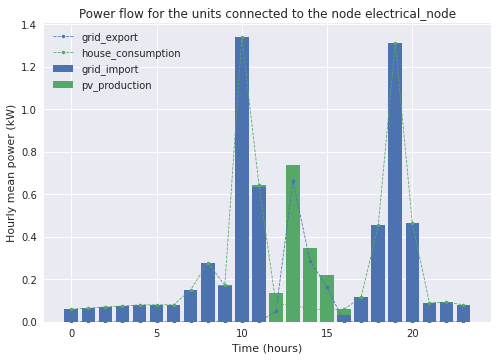

In [18]:
plot_node_energetic_flows(elec_node)

    The argument we enter is the node we defined at fifth step.
    
    plot_node_energetic_flows will plot the energy flows that go through an EnergyNode

`learn more plotting functions:` : <a href="https://omegalpes.readthedocs.io/en/latest/api/general.html#module-omegalpes.general.utils.plots">plots module</a>

     Let us compare it with the data we got
<img src="./images/1-result.jpg" alt="Graph is produced using OmegAlpes">

    As we can observe in these graphs, OmegAlpes will import when there is a need for electricity and export when there is  surplus. Here is another quiz!

In [19]:
%run Python_Scripts/quiz/quiz_tutorial13

 Did you realize that the model was optimized according to the objective grid_import.minimize_production?
OmegAlpes will prioritize PV production before importing electricity from the grid. Do you know at what hour it happened? 


RadioButtons(options=(('2', 1), ('13', 2), ('16', 3)), value=1)

Button(description='check answer', style=ButtonStyle())

Output()

## Result processing
    There are also some way to process the result aside from plotting.
    
    For example, if we want to show total house consumption. We can run following line

In [20]:
print('House consumption = {0} kWh'.format(sum(house_consumption.p.get_value())))
    

House consumption = 6.041999999999999 kWh


    It is time for another challenge!

In [21]:
%run Python_Scripts/quiz/quiz_tutorial12

In [22]:
#work on your challenge here

## Discussion
    As you may have realized, this optimisation model with only PV is not optimal. But don't worry! Next tutorials we will  learn how to add more components to the model to get more optimal results. You may expect some solutions such as adding   storage unit, comparing costs and utilizing thermal energy.

    Let us return to the dashboard so we can progress more in finding optimal solution for John. Don't forget to collect 3  magic words in this tutorial by finishing tasks in order to unlock your progress!
    
`[Link]` <a href="./OmegAlpes_tutorial.ipynb">Dashboard</a><br><br>
     